In [ ]:
#ID NUMBER   : 190031094
#NAME        : Naveen  
#PRACTICAL   : #4 Random Forest

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
file = pd.read_csv('Social_Network_Ads.csv')
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
file.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
file.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
file.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
gen = {'Male':1,'Female':2}

file.Gender= [gen[x] for x in file.Gender]
file

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,2,46,41000,1
396,15706071,1,51,23000,1
397,15654296,2,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
X = file.iloc[:,:-1]
Y = file.iloc[:,-1]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [ ]:
# Scaling the data in place of data preprocessing
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
clfr = DecisionTreeClassifier(criterion='entropy',random_state = 0)

clfr.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = clfr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [ ]:
# print(np.concatenate((y_pred.reshape(len(y_pred),1),Y_test.reshape(len(Y_test),)),1))

In [ ]:
# Printing cofusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print(cm)

[[65  3]
 [ 5 27]]


In [ ]:
accuracy_score(Y_test,y_pred)

0.92

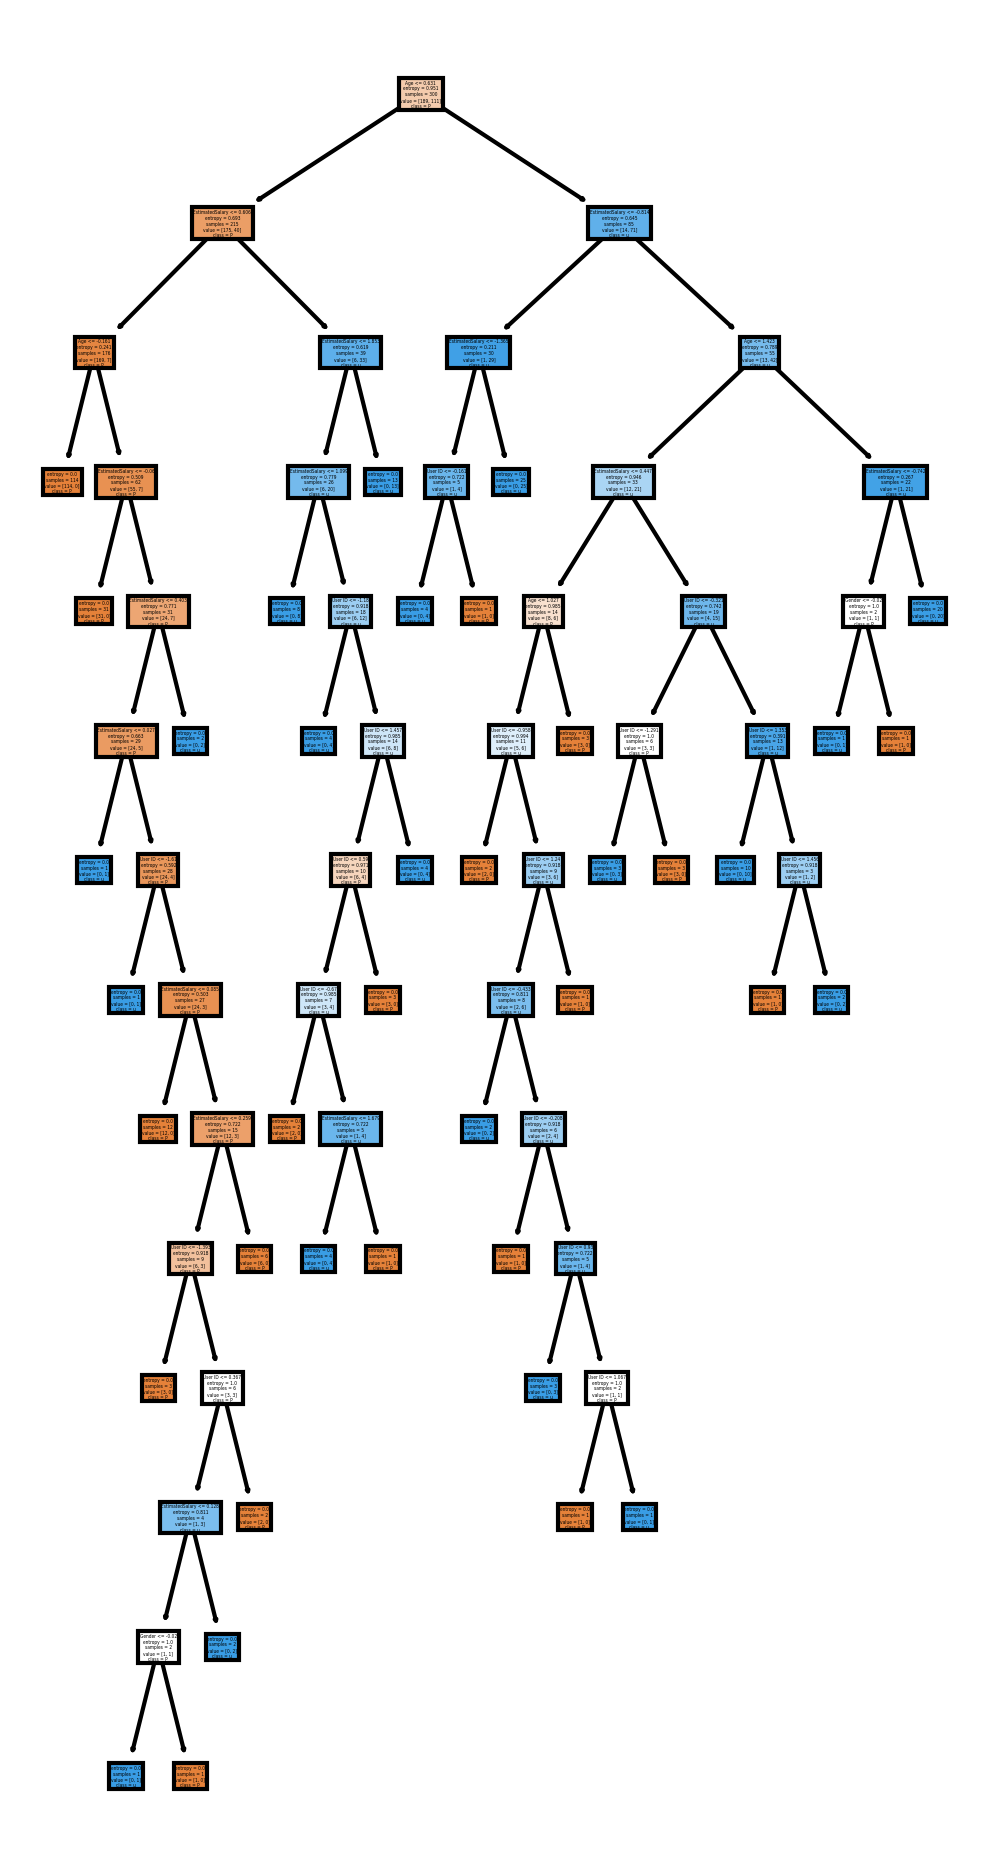

In [ ]:
# Visualization of the tree
from sklearn.tree import plot_tree
from sklearn import tree

fns = ['User ID','Gender','Age','EstimatedSalary']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,8), dpi=300)
tree.plot_tree(clfr,feature_names = fns, class_names= 'Purchased',filled = True);